## 표준 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터세트 로딩
- Raw Data : 정제가 되지 않은 데이터 세트
- 토이 데이터 : 분석에 용이한 형태로 만들어진 연습용 데이터 세트

In [2]:
chipo = pd.read_csv('D:/python3/data/chipotle.tsv', sep='\t')#, encoding='utf-8')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### step1. 기본 정보 탐색

In [3]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [4]:
chipo.shape   # 차원 (레이블, 피처)

(4622, 5)

#### chipo 데이터세트의 피처 분석
- order_id : 주문번호
- quantity : 주문수량
- item_name : 메뉴명
- choice_description : 토핑(소스 + 토핑)
- item_price : 메뉴가격

### 분석 주제나 목적  
1. 가장 많이 판매된 메뉴 Top 10은 무엇일까?  
2. 음식 메뉴는 총 몇 가지일까?  
3. 메뉴별 판매량은 얼마나 될까?  
4. 메뉴별 가격대는 얼마일까?  
5. 메뉴 중 제일 비싼 메뉴는 무엇일까?  
6. 어떤 음식 조합이 제일 선호될까?

In [5]:
# 수치형 데이터의 기초통계량을 분석하는 함수  (연속 or 비연속 데이터)
chipo.describe()        # 연속 - 쉼표 가짐. 쪼갤 수 있음 # 비연속 - x

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### 피처(Feature, Column, Attribute속성)
1. 수치형 피처 : 연속형(실수형float), 비연속형(정수형int)
2. 범주형 피처 : 순서가 있는 범주형, 순서가 없는 범주형(명목형)
    (문자형)        ex.A학점,B학점   ex. 혈액형(A,B,O,AB)

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [7]:
chipo.tail(10)  # choice_description [소스, [토핑]] -> 정제  -> 정규표현식re 이용

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [4]:
# order_id를 범주형 데이터로 변형  (수치형[숫자]->범주형[문자])
# astype - 자료형 변경 /  is~ - 해당 자료형이 맞습니까? True or False
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [9]:
# 범주형 데이터의 개수 확인, unique() => drop(중복 제거) + sort(정렬,오름차순)
# order_id, item_name
# len()
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [10]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [11]:
# value_counts() : 개별 요소의 건수를 계산하여 반환
len(chipo['item_name'].value_counts())  # == len(chipo['item_name'].unique())
# 2. 음식 메뉴는 총 몇 가지일까?  -> 50

50

### step2. 인사이트(Insight) 발견 : 탐색과 시각화

#### 가장 많이 판매된 메뉴 Top 10

In [12]:
# 1. 가장 많이 판매된 메뉴 Top 10은 무엇일까?
# value_counts() 함수는 오로지 Series객체에만 적용된다.
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [23]:
item_count = chipo['item_name'].value_counts()[:10]

# enumerate(array, start=number)    // array - 집합변수 / start 생략가능
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):   # 1 : 시작값
    print("Top ", idx, " : ", val, cnt)

Top  1  :  Chicken Bowl 726
Top  2  :  Chicken Burrito 553
Top  3  :  Chips and Guacamole 479
Top  4  :  Steak Burrito 368
Top  5  :  Canned Soft Drink 301
Top  6  :  Steak Bowl 211
Top  7  :  Chips 211
Top  8  :  Bottled Water 162
Top  9  :  Chicken Soft Tacos 115
Top  10  :  Chicken Salad Bowl 110


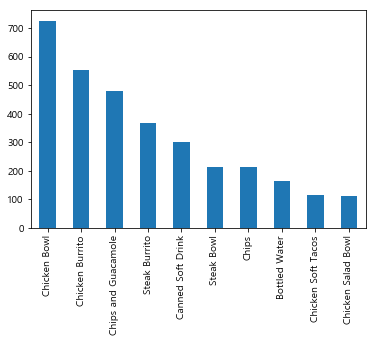

In [26]:
item_count.plot(kind='bar')

plt.show()

In [14]:
# item_count.items() == item_count.iteritems()
# iteritems를 쓰면,, 시작 인덱스를 담을 수 있음

In [15]:
# 3. 메뉴별 판매량은 얼마나 될까?   -> groupby
# chipo['item_name'].value_counts() -> 전체 메뉴 건수

### 메뉴별 주문 개수와 총량 

In [16]:
# item_name별 주문(order_id) 개수
# groupby() : DataFrame.groupby('기준컬럼명')   / 시리즈 -> 컬럼.그룹바이('기준인덱싱')
order_count = chipo.groupby('item_name')['order_id'].count()  # -> 주문번호에 따른 건수
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [17]:
# item별 주문 총량 : 주문 수량의 합계
order_quantity = chipo.groupby('item_name')['quantity'].sum()
order_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [18]:
# 4. 메뉴별 가격대는 얼마일까?   # 정확히 알기 힘듬,,
# >> 메뉴별 평균금액.. 아래

In [19]:
# 5. 메뉴 중 제일 비싼 메뉴는 무엇일까?

In [5]:
# os별로 한글처리하는 작업
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown system.....")

In [6]:
# 주문총량
item_name_list = order_quantity.index.tolist()  # index - 메뉴명 / tolist() - 메뉴들이 리스트타입으로 저장,,
item_name_list[:10]

NameError: name 'order_quantity' is not defined

In [7]:
x_pos = np.arange(len(item_name_list))  # 메뉴명 대신 숫자(arange)를 만들어 x축에 넣음
y_pos = order_quantity.values.tolist()  # 시각화할땐 리스트타입으로 변경해야함..

plt.bar(x_pos, y_pos)
plt.title('전체 메뉴별 주문 총량')  # 건수별 주문총량도 추가해보자....
plt.xlabel('메뉴인덱스')
plt.ylabel('주문수량')
plt.show()

NameError: name 'item_name_list' is not defined

### step3. 데이터 전처리 & 데이터 통계분석

In [23]:
chipo.info()
# 전처리 대상 
# >> choice_description - 결측값(NaN) 대체
# >> item_price - 문자형 - '$'없애기 (수치형으로 변환)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.6+ KB


In [ ]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

#### item_price 자료형을 수치형으로 변환하는 작업

In [ ]:
# 첫번째 방법 - 함수로 만들기
def func(x):
    return float(x[1:])

In [ ]:
# 두번째 방법 - 문자열처리
# strip() : 좌우 공백을 제거하는 문자열 관련 함수
chipo['item_price'] = chipo['item_price'].str.lstrip('$')  # lstrip - left strip
chipo['item_price'].astype(float)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [ ]:
chipo.describe() # ... 수치형으로 안바꼈네??

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [8]:
# 세번째 방법 - 람다함수
# 익명의 함수 lambda 입력 : 출력
# apply(함수) : 반복적으로 수행하는 작업
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [9]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [ ]:
# 메뉴별 평균 금액 => 제일 비싼 메뉴와 평균가격을 파악할 수 있다.
chipo_cost = chipo.groupby('item_name')['item_price'].mean()  # 메뉴별 평균 가격
chipo_cost.sort_values(ascending=False)        # 정렬(내림차순) - 가장비싼거=Bowl

item_name
Carnitas Crispy Tacos                    1.994286
Veggie Soft Tacos                        1.708571
Barbacoa Crispy Tacos                    1.655455
Steak Salad Bowl                         1.503103
Carnitas Salad Bowl                      1.390000
Bowl                                     1.300000
Chicken Salad Bowl                       1.279545
Chicken Crispy Tacos                     1.279362
Steak Burrito                            1.253886
Steak Bowl                               1.247346
Chicken Burrito                          1.178698
Barbacoa Salad Bowl                      1.140000
Carnitas Bowl                            1.128088
Steak Crispy Tacos                       1.124000
Veggie Bowl                              1.105765
Chicken Bowl                             1.097424
Veggie Salad Bowl                        1.027778
Chicken Soft Tacos                       1.026870
Carnitas Salad                           0.990000
Carnitas Burrito                        

In [ ]:
# 6. 어떤 음식 조합이 제일 선호될까?

### 가장 많이 선호하는 메뉴는 무엇인가?

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,0.39
1,1,1,Izze,[Clementine],0.39
2,1,1,Nantucket Nectar,[Apple],0.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,0.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",6.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",0.98
6,3,1,Side of Chips,NaN,0.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",1.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",0.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",0.25


In [ ]:
# 메뉴순위체크 - 메뉴주문수량 순위체크
# 주로 많이 먹는 메뉴명
# 메뉴별 인기있는 선택옵션

#chipo = chipo.drop(['order_id', 'item_price'], inplace=True)  # 필요없는 데이터삭제,,
#chipo[:10]

In [10]:
# choice_description 결측처리 : Origin
chipo['choice_description'].fillna('Origin', inplace=True)  # NaN -> Origin
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Origin,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Origin,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### choice_description 피처
- [[소스], [토핑]] => [소스, [토핑]]
- 두 개의 열로 쪼개는 작업 : sauce, topping

In [ ]:
chipo['choice_description'].head(15)

0                                                Origin
1                                          [Clementine]
2                                               [Apple]
3                                                Origin
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...
6                                                Origin
7     [Tomatillo Red Chili Salsa, [Fajita Vegetables...
8     [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...
9     [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...
10                                               Origin
11    [Roasted Chili Corn Salsa, [Fajita Vegetables,...
12    [Roasted Chili Corn Salsa, [Rice, Black Beans,...
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...
14                                               Origin
Name: choice_description, dtype: object

In [ ]:
type(chipo['choice_description'])

pandas.core.series.Series

In [11]:
# 파이썬 정규표현식
import re

num = 0
for i in chipo['choice_description']:
    # 패턴 [^a-zA-Z, ] : 알파벳과 ',' 그리고 공백을 제외하고 모두 지우겠다는 의미  / sub -> 제외하겠다 /repl=> replace  교체(공백)
    chipo['choice_description'][num] = re.sub(pattern='[^a-zA-Z, ]', repl='', string=i)  # 영소문자.대문자.쉼표.공백.
    num += 1
    
    

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [16]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Origin,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Origin,2.39
4,2,2,Chicken Bowl,"TomatilloRed Chili Salsa Hot, Black Beans, Ric...",16.98
5,3,1,Chicken Bowl,"Fresh Tomato Salsa Mild, Rice, Cheese, Sour Cr...",10.98
6,3,1,Side of Chips,Origin,1.69
7,4,1,Steak Burrito,"Tomatillo Red Chili Salsa, Fajita Vegetables, ...",11.75
8,4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, Pinto Beans, Chee...",9.25
9,5,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Pinto B...",9.25


1. list => DataFrame
2. Series => DataFrame : Series객체.to_frame()     # 데이터프레임 형식으로 변형
3. DataFrame 컬럼 추가/삭제                        # 삭제-> drop, axis=1

In [12]:
# 주문당 평균 계산금액 추출하기
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Origin,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Origin,2.39
4,2,2,Chicken Bowl,"TomatilloRed Chili Salsa Hot, Black Beans, Ric...",16.98
5,3,1,Chicken Bowl,"Fresh Tomato Salsa Mild, Rice, Cheese, Sour Cr...",10.98
6,3,1,Side of Chips,Origin,1.69
7,4,1,Steak Burrito,"Tomatillo Red Chili Salsa, Fajita Vegetables, ...",11.75
8,4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, Pinto Beans, Chee...",9.25
9,5,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Pinto B...",9.25


In [15]:
chipo.groupby('order_id')['item_price'].sum().mean()  # 주문번호별 합계의 평균
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Origin,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Origin,2.39
4,2,2,Chicken Bowl,"TomatilloRed Chili Salsa Hot, Black Beans, Ric...",16.98


In [14]:
chipo.groupby('order_id')['item_price'].sum().describe()  # 주문번호별로 묶은 후 합계 - 수치데이터 확인

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [19]:
# 한 주문에 10달러 이상 지출한 주문번호를 추출하시오.
# step1. 주문번호별 주문 금액의 합계 계산
chipo_orderid_group = chipo.groupby('order_id')['item_price'].sum()
# step2. 금액에서 10달러 이상인 자료만 추출
#print(type(chipo_orderid_group))  # >> Series
result = chipo_orderid_group[chipo_orderid_group >= 10]
result[:10]

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
1002    10.68
1003    13.00
1004    21.96
1005    12.15
1006    71.40
Name: item_price, dtype: float64

### 메뉴별 가격 구하기

In [ ]:
# 메뉴별 가격을 예측하는 작업
## 순수한 메뉴의 가격을 확인 : choice_description이 한 개인 데이터
## 메뉴명으로 그룹화한 후 가장 작은 값

# >> 수정...

In [21]:
# 수량이 1개인 제품만 골라낸다.
chipo_one_item = chipo[chipo.quantity == 1]

# 메뉴별 금액이 가장 작은 값
chipo_per_item = chipo_one_item.groupby('item_name').min()
chipo_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,Coke,6.49
Barbacoa Bowl,1000,1,"Fresh Tomato Mild, Lettuce, Black Beans, Rice",8.69
Barbacoa Burrito,1002,1,"Black Beans, Rice, Cheese",8.69
Barbacoa Crispy Tacos,110,1,"Fresh Tomato Salsa Mild, TomatilloGreen Chili ...",8.99
Barbacoa Salad Bowl,1283,1,"Fresh Tomato Salsa, Fajita Vegetables, Rice, B...",9.39
Barbacoa Soft Tacos,1103,1,"Fresh Tomato Salsa Mild, Roasted Chili Corn Sa...",8.99
Bottled Water,1009,1,Origin,1.09
Bowl,279,1,"AdoboMarinated and Grilled Steak, Sour Cream, ...",7.40
Burrito,214,1,"AdoboMarinated and Grilled Chicken, Pinto Bean...",7.40
